# Let's make histograms for $20 \times 25$ Logbins

In [1]:
base_directory = '/home/shoaib/ZTFDataChallenge/'

import sys
sys.path.insert(0, base_directory + 'dmdt_Analysis/')
from dmdt_functions import *

In [2]:
import numpy as np
import pandas as pd
from os import listdir

from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True, nb_workers=5)

from tqdm.auto import tqdm
tqdm.pandas(desc="Lightcurves Processed")

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
plt.rcParams['axes.grid'] = False
# plt.style.use('seaborn-v0_8-colorblind')

INFO: Pandarallel will run on 5 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [3]:
qso_types = ['Q', 'QR', 'QX']

In [7]:
lightcurves_by_name = pd.read_pickle(base_directory + 'lightcurves_by_name.pkl').dropna()
# lightcurves_by_name = lightcurves_by_name[lightcurves_by_name['type'].isin(qso_types)]
### Sampling to save disk space

lightcurves_by_name = lightcurves_by_name.merge(right=pd.read_pickle(base_directory + 'lightcurves_by_name_1day_binned.pkl')[['name', 'r_lightcurve']],
                                                how='left', on='name', suffixes=(None, '_1day'))

lightcurves_by_name

,name,type,ra,dec,g_timespan_good,g_n_good_det,g_oids,g_lightcurve,r_timespan_good,r_n_good_det,r_oids,r_lightcurve,r_lightcurve_1day
0,1AXG J000605+2031,AX,1.497482,20.523582,964.688067,229.0,"[550110200005509, 550110200005509, 55011020000...","[[58268.4661921, 17.2914085, 0.0193178076], [5...",981.708229,222.0,"[550210200011033, 550210200011033, 55021020001...","[[58268.4470486, 17.2935829, 0.0198369212], [5...","[[58268.4470486, 17.2935829, 0.0198369212], [5..."
1,1AXG J035008-1149,AX,57.522460,-11.824012,376.989526,10.0,"[1344109100000968, 1345112200001061, 134410910...","[[58390.4113657, 19.8996181, 0.129595727], [58...",340.960799,6.0,"[1344209100007817, 1344209100007817, 134521220...","[[58432.3809954, 19.886844600000003, 0.1277610...","[[58432.3809954, 19.886844600000003, 0.1277610..."
2,1AXG J102337+1936,AX,155.906410,19.607236,1125.946574,302.0,"[1617102300000313, 572112300000950, 5721123000...","[[58202.2667708, 19.302185100000003, 0.0567675...",1111.032025,372.0,"[571209400025315, 572212300012759, 57120940002...","[[58217.2006713, 19.074201600000002, 0.0849977...","[[58217.219910299995, 19.046276484193328, 0.04..."
3,1AXG J103934+5330,AX,159.899004,53.510771,1125.941366,596.0,"[787106300012098, 787106300012098, 78710630001...","[[58202.278287, 18.849639899999996, 0.07062309...",1110.976366,1094.0,"[787206300003755, 787206300003755, 78720630000...","[[58217.208044, 18.4565163, 0.0527343191], [58...","[[58217.230601849995, 18.48850504726787, 0.027..."
4,1AXG J141240-1209,ARX,213.163559,-12.152564,1124.960092,97.0,"[374101100002157, 374101100002157, 37410110000...","[[58203.3556019, 18.353233300000003, 0.0372927...",1110.925174,125.0,"[374201100002922, 374201100002922, 37420110000...","[[58217.3477083, 17.7982368, 0.03306688], [582...","[[58217.36368055, 17.814682149716198, 0.023658..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31841,[MML2015] 5BZU J2303-1841,Blazar Uncertain type,345.762389,-18.690489,943.647153,113.0,"[343107300003455, 343107300003455, 34310730000...","[[58271.4817361, 17.5503979, 0.0294231866], [5...",934.600636,122.0,"[343207300022649, 343207300022649, 34320730002...","[[58280.4806019, 17.1972923, 0.021261705099999...","[[58280.4806019, 17.1972923, 0.021261705099999..."
31842,[MML2015] 5BZU J2352+3947,Blazar Uncertain type,358.203798,39.798961,880.858472,126.0,"[735105200025684, 735105200025684, 73510520002...","[[58263.4649421, 21.2750149, 0.199958682], [58...",1055.069306,274.0,"[735205200008210, 735205200008210, 73520520000...","[[58273.4300694, 20.5700836, 0.156238914], [58...","[[58273.4300694, 20.5700836, 0.156238914], [58..."
31843,[MML2015] 5BZU J2354-0405,Blazar Uncertain type,358.715322,-4.084275,949.702442,143.0,"[396108300002183, 396108300002183, 39610830000...","[[58280.4460301, 18.0638905, 0.0327166282], [5...",955.627373,160.0,"[396208300004495, 396208300004495, 39620830000...","[[58274.4822801, 17.906671499999998, 0.0324850...","[[58274.4822801, 17.9066715, 0.0324850902], [5..."
31844,eHAQ0142+0257,QR,25.528603,2.953628,957.648796,214.0,"[450107400003174, 450107400003174, 45010740000...","[[58298.4827431, 18.9552612, 0.063075698899999...",962.719190,342.0,"[450207400009426, 450207400009426, 45020740000...","[[58301.4430787, 17.906868, 0.0333674327], [58...","[[58301.4430787, 17.906868, 0.0333674327], [58..."


In [ ]:
lightcurves_by_name = pd.read_pickle(base_directory + 'lightcurves_by_name.pkl').dropna()
# lightcurves_by_name = lightcurves_by_name[lightcurves_by_name['type'].isin(qso_types)]
### Sampling to save disk space

lightcurves_by_name = lightcurves_by_name.merge(right=pd.read_pickle(base_directory + 'lightcurves_by_name_1day_binned.pkl')['name', 'r_lightcurve'],
                                                how='left', on='name', suffixes=(None, '_1day'))

lightcurves_by_name_1day 

lightcurves_by_oid = pd.read_pickle(base_directory + 'lightcurves_by_oid_1day_binned.pkl').dropna()
# lightcurves_by_oid = lightcurves_by_oid[lightcurves_by_oid['type'].isin(qso_types)]
### Sampling to save disk space
lightcurves_by_oid = lightcurves_by_oid.sample(frac=0.1)

In [5]:
def return_histogram(lightcurve, dm_bins, dt_bins):
    histogram, _, _ = get_dmdt_histogram(lightcurve[:, 1], dm_bins, lightcurve[:, 0], dt_bins)
    return histogram

Loading the bins

In [6]:
### Making the bins
dm_bins = np.linspace(-1.5, 1.5, 21)
dt_bins = np.logspace(0, np.log10(1200), 26)

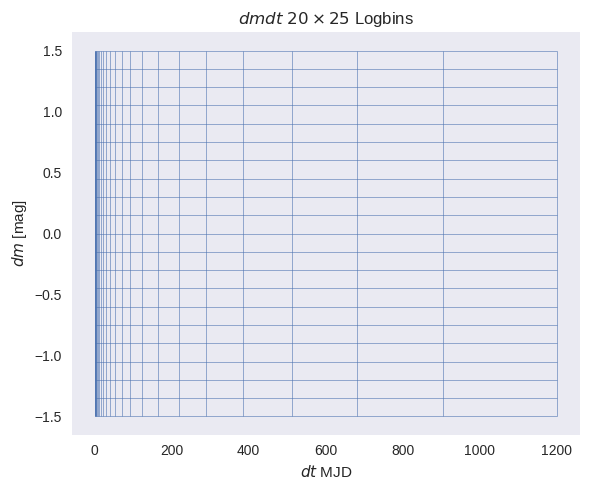

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))

ax.hlines(dm_bins, dt_bins.min(), dt_bins.max(), linewidth=0.4)
ax.vlines(dt_bins, dm_bins.min(), dm_bins.max(), linewidth=0.4)
ax.set_title('$dmdt$ $20 \\times 25$ Logbins')
ax.set_xlabel('$dt$ MJD')
ax.set_ylabel('$dm$ [mag]')

plt.tight_layout()
plt.show()

## By Name

In [8]:
lightcurves_by_name['r_histogram_1day_cadence'] = lightcurves_by_name['r_lightcurve_1day_binned'].parallel_apply(lambda lightcurve: return_histogram(lightcurve, dm_bins, dt_bins))
lightcurves_by_name['g_histogram_1day_cadence'] = lightcurves_by_name['g_lightcurve_1day_binned'].parallel_apply(lambda lightcurve: return_histogram(lightcurve, dm_bins, dt_bins))

lightcurves_by_name['r_histogram_original_cadence'] = lightcurves_by_name['r_lightcurve'].parallel_apply(lambda lightcurve: return_histogram(lightcurve, dm_bins, dt_bins))
lightcurves_by_name['g_histogram_original_cadence'] = lightcurves_by_name['g_lightcurve'].parallel_apply(lambda lightcurve: return_histogram(lightcurve, dm_bins, dt_bins))

In [9]:
lightcurves_by_name.to_pickle(base_directory + 'dmdt_Analysis/20x25_LogBins/20x25_logbin_histograms_by_name.pkl')

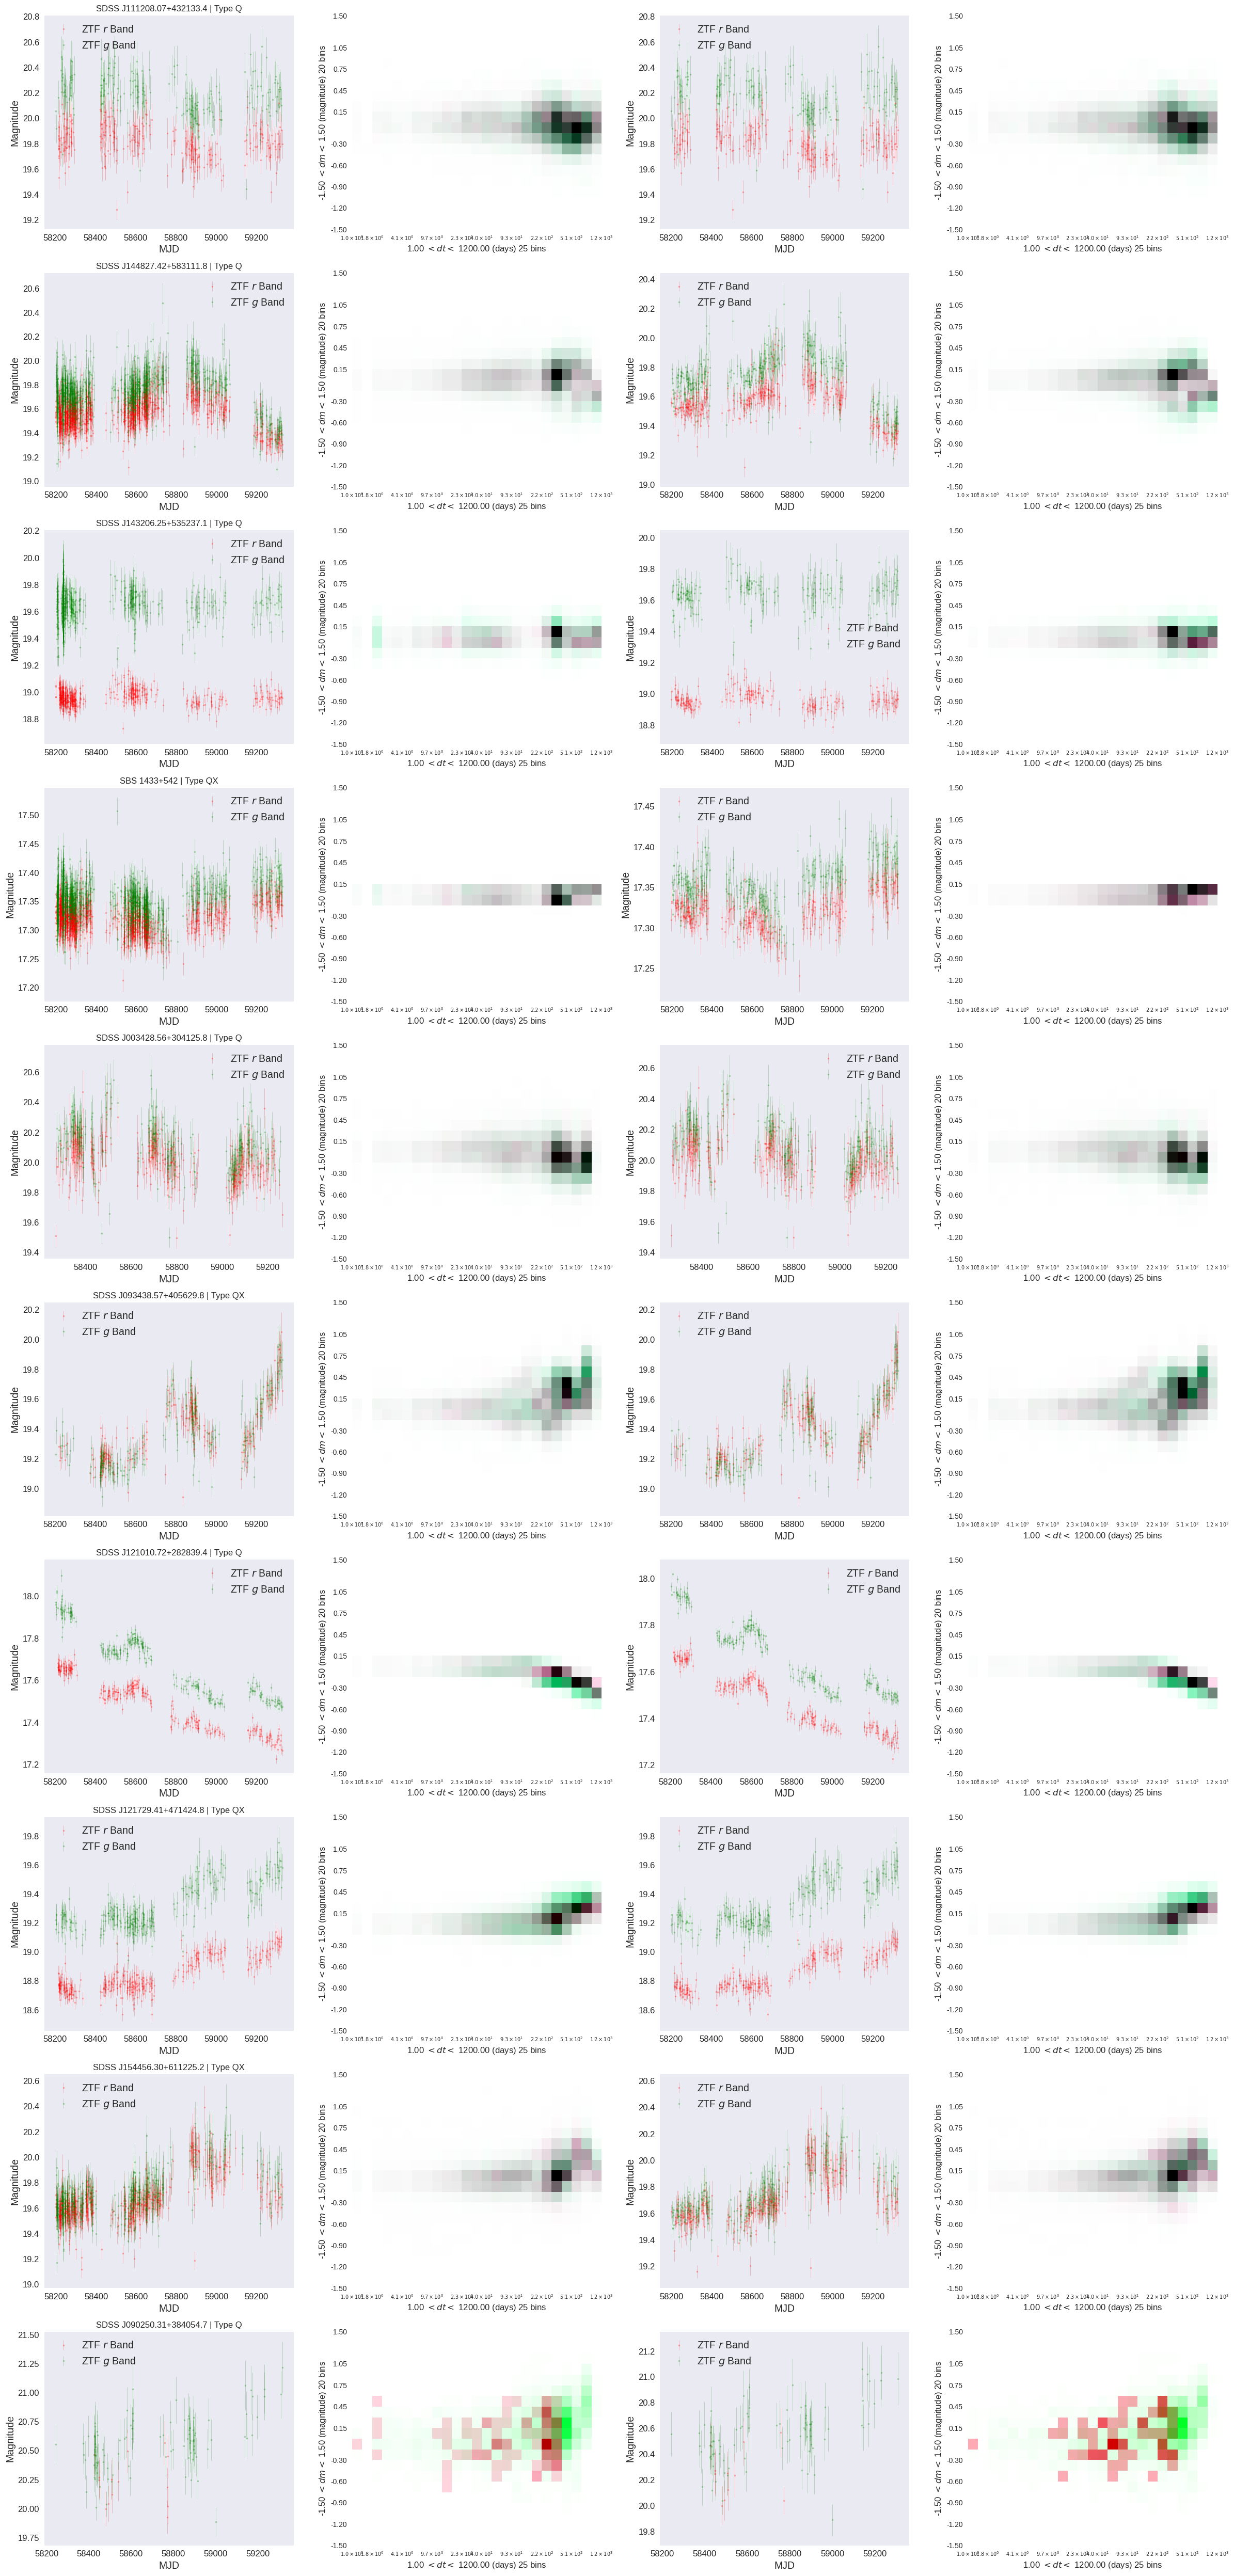

In [10]:
num_examples = 10
sample_df_by_name = lightcurves_by_name[lightcurves_by_name['type'].isin(qso_types)].sample(num_examples)
sample_df_by_oid = lightcurves_by_oid[lightcurves_by_oid['type'].isin(qso_types)].sample(num_examples)

fig, axs = plt.subplots(nrows=num_examples, ncols=4, figsize=(6 * 4, num_examples * 5))

for i, ax_row in enumerate(axs):
    object_name = sample_df_by_name['name'].iloc[i]
    object_type = sample_df_by_name['type'].iloc[i]
    object_lightcurve_r_original = sample_df_by_name['r_lightcurve'].iloc[i]
    object_lightcurve_g_original = sample_df_by_name['g_lightcurve'].iloc[i]
    object_lightcurve_r_1day = sample_df_by_name['r_lightcurve_1day_binned'].iloc[i]
    object_lightcurve_g_1day = sample_df_by_name['g_lightcurve_1day_binned'].iloc[i]
    object_histogram_r_original_cadence = sample_df_by_name['r_histogram_original_cadence'].iloc[i]
    object_histogram_g_original_cadence = sample_df_by_name['g_histogram_original_cadence'].iloc[i]
    object_histogram_r_1day_cadence = sample_df_by_name['r_histogram_1day_cadence'].iloc[i]
    object_histogram_g_1day_cadence = sample_df_by_name['g_histogram_1day_cadence'].iloc[i]
    ax_row[0].set_title(f'{object_name} | Type {object_type}')
    draw_single_axis_both_bands(ax_row[0], object_lightcurve_r_original, object_lightcurve_g_original)
    draw_showcase_histogram(ax_row[1], object_histogram_r_original_cadence, object_histogram_g_original_cadence, dm_bins, dt_bins)
    draw_single_axis_both_bands(ax_row[2], object_lightcurve_r_1day, object_lightcurve_g_1day)
    draw_showcase_histogram(ax_row[3], object_histogram_r_1day_cadence, object_histogram_g_1day_cadence, dm_bins, dt_bins)

    plt.tight_layout()

## By OID

In [11]:
lightcurves_by_oid['histogram_1day_cadence'] = lightcurves_by_oid['lightcurve_1day_binned'].parallel_apply(lambda lightcurve: return_histogram(lightcurve, dm_bins, dt_bins))
lightcurves_by_oid['histogram_original_cadence'] = lightcurves_by_oid['lightcurve'].parallel_apply(lambda lightcurve: return_histogram(lightcurve, dm_bins, dt_bins))

In [12]:
lightcurves_by_oid.to_pickle(base_directory + 'dmdt_Analysis/20x25_LogBins/20x25_logbin_histograms_by_oid.pkl')

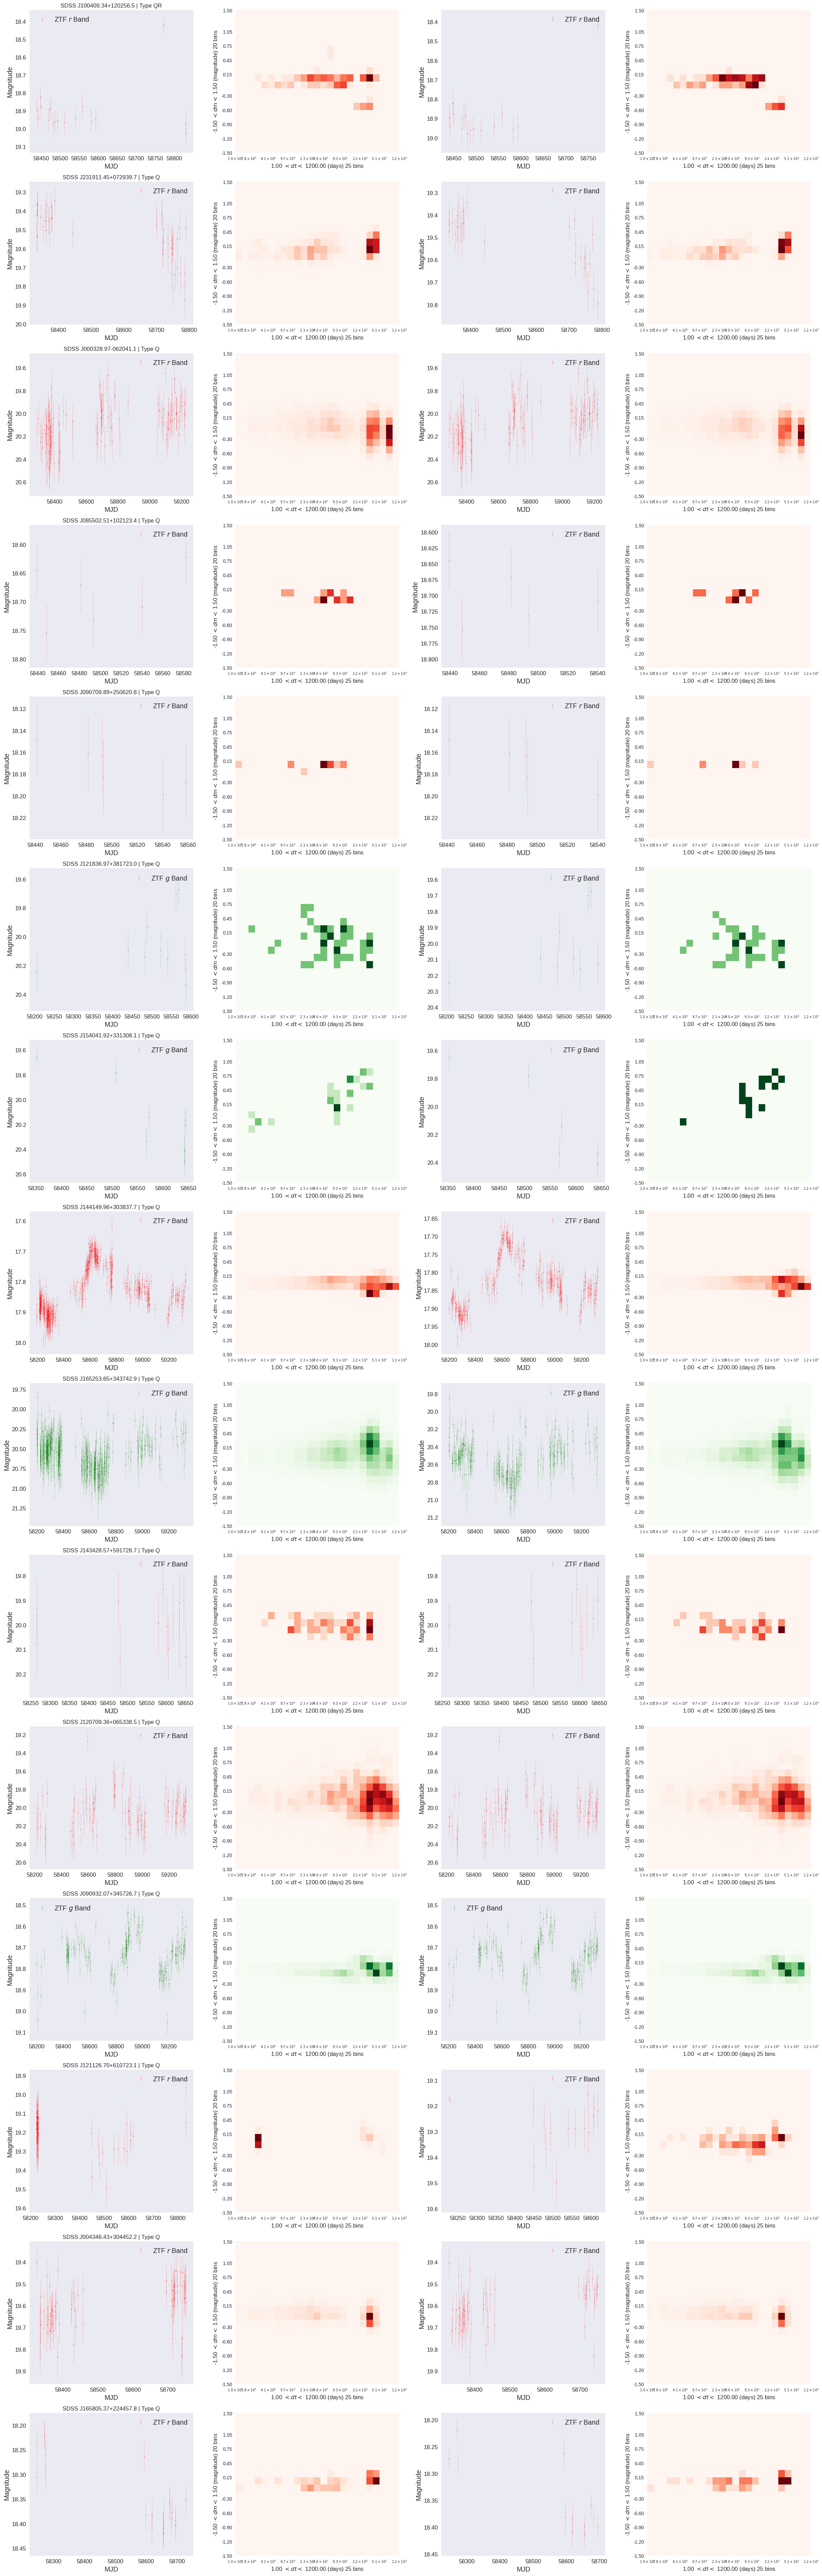

In [13]:
num_examples = 15
sample_df_by_name = lightcurves_by_name[lightcurves_by_name['type'].isin(qso_types)].sample(num_examples)
sample_df_by_oid = lightcurves_by_oid[lightcurves_by_oid['type'].isin(qso_types)].sample(num_examples)

fig, axs = plt.subplots(nrows=num_examples, ncols=4, figsize=(6 * 4, num_examples * 5))

for i, ax_row in enumerate(axs):
    oid = sample_df_by_oid['oid_alerce'].iloc[i]
    oid_name = sample_df_by_oid['name'].iloc[i]
    oid_type = sample_df_by_oid['type'].iloc[i]
    oid_band = sample_df_by_oid['band'].iloc[i]
    oid_lightcurve_original = sample_df_by_oid['lightcurve'].iloc[i]
    oid_lightcurve_1day = sample_df_by_oid['lightcurve_1day_binned'].iloc[i]
    oid_histogram_original_cadence = sample_df_by_oid['histogram_original_cadence'].iloc[i]
    oid_histogram_1day_cadence = sample_df_by_oid['histogram_1day_cadence'].iloc[i]
    ax_row[0].set_title(f'{oid_name} | Type {oid_type}')
    draw_single_axis_single_band(ax_row[0], oid_band, oid_lightcurve_original)
    draw_single_channel_dmdt_histogram(ax_row[1], oid_histogram_original_cadence, oid_band, dm_bins, dt_bins)
    draw_single_axis_single_band(ax_row[2], oid_band, oid_lightcurve_1day)
    draw_single_channel_dmdt_histogram(ax_row[3], oid_histogram_1day_cadence, oid_band, dm_bins, dt_bins)
    
    plt.tight_layout()